In [3]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(42)  # For reproducibility
n_points = 50  # Number of points per class

In [4]:
def plot_dataset(X, y):
    """
    Plot a 2D dataset.

    Parameters:
        X : numpy.ndarray
            Input features, shape (n_samples, n_features).
        y : numpy.ndarray
            Target labels, shape (n_samples,).
    """
    # Plot the dataset
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Scatter plot of the dataset')
    plt.show()

In [5]:
def plot_decision_boundary(self, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the function value for the whole grid
    Z = self.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')

In [6]:
def subplot_decision_boundary(self, X, y, ax=None):
    if ax is None:
        fig, ax = plt.subplots()

    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the function value for the whole grid
    Z = self.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    ax.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.Spectral)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title('Decision Boundary')
    return ax

### Easy Dataset
Dataset 1(Easy): Linearly separable dataset. 

Decision boundary should be close to line $$y = x - 6$$

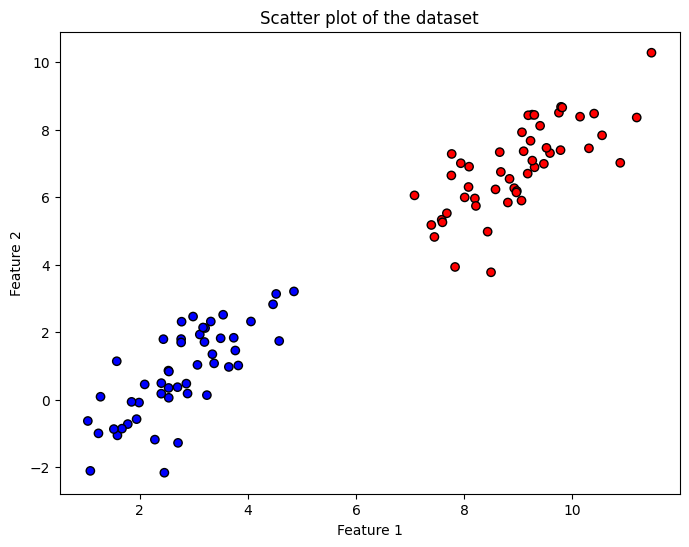

In [7]:
x1e_class1 = np.random.normal(3, 1, n_points)
x2e_class1 = x1e_class1 - 2 + np.random.normal(0, 1, n_points)
x1e_class2 = np.random.normal(9, 1, n_points)
x2e_class2 = x1e_class2 - 2 - np.random.normal(0, 1, n_points)


X_e = np.vstack((np.column_stack((x1e_class1, x2e_class1)), np.column_stack((x1e_class2, x2e_class2))))
y_e = np.hstack((np.zeros(n_points), np.ones(n_points)))
plot_dataset(X_e,y_e)

## Question 1
FILL the code for perceptron and test it for the **Easy** dataset

In [27]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=110):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0
        # Set binary class labels for the dataset
        y_ = np.array([1 if i> 0 else 0 for i in y])
        
        
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                #Implement using dot product (inner product)". 
                #Only dot product (inner product) implementation will be accepted. Use Numpy for this purpose
                # Calculate points and predict
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)
                # Update perceptron
                update = self.lr * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

                
    def predict(self, X):
        # Calculate the points (Shown in class)
        # Use activation function to predict
        #########################
        # Write your code here
        #########################
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

    def _unit_step_func(self, x):
        #Implement step function return the value
        #########################
        # Write your code here
        x_ = np.where(x >= 0, 1, 0)
        return x_

aaaaaaaaaaa


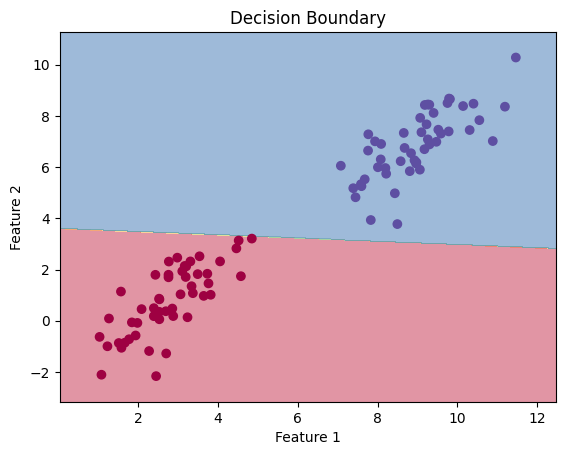

In [28]:
p = Perceptron()
p.fit(X_e,y_e)

print("Control am I here aaaaaaaaaaa")

plot_decision_boundary(p,X_e,y_e)
plt.show()

## Question 2
FILL the code for LMSE and test it for the **Easy** dataset

In [63]:
class LMSE:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Set binary class labels for the dataset
        y_ = np.array([1 if i > 0 else 0 for i in y])
        
        
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                #Implement using dot product (inner product)". 
                #Only dot product (inner product) implementation will be accepted. Use Numpy for this purpose
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)
                dw = (y_[idx] - y_predicted) * self.lr *  x_i # weights
                db =  (y_[idx] - y_predicted) * self.lr 
                self.weights += self.lr * dw
                self.bias += self.lr * db
                
    def predict(self, X):
        # Calculate the points (Shown in class)
        # Use activation function to predict
        #########################
        # Write your code here
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted


    def _unit_step_func(self, x):
        #Implement step function return the value
        #########################
        # Write your code here
        x_ = np.where(x >= 1, 1, 0)
        return x_



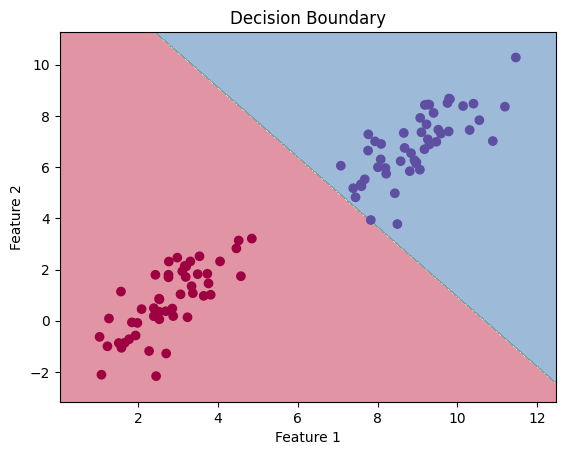

In [64]:
l = LMSE()
l.fit(X_e,y_e)
plot_decision_boundary(l,X_e,y_e)
plt.show()

### Hard Dataset
Dataset 2(Hard): Non-linearly separable dataset 
Decision boundary should be close to line $$y = x - 6$$ with some overlap

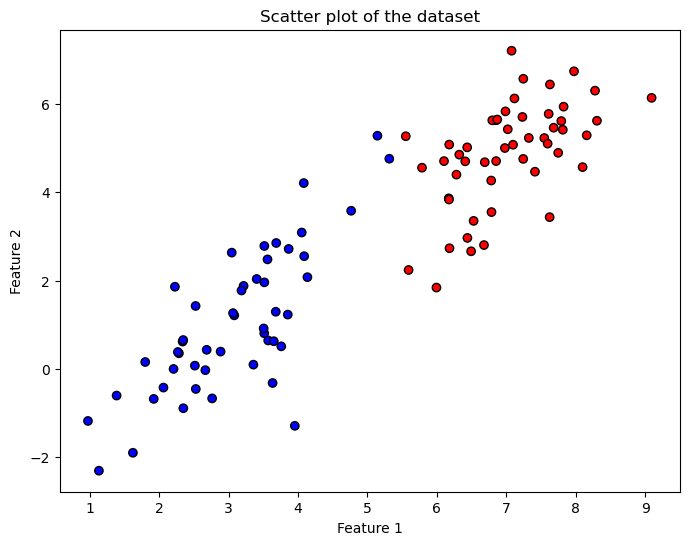

In [4]:
x1h_class1 = np.random.normal(3, 1, n_points)
x2h_class1 = x1h_class1 - 2 + np.random.normal(0, 1, n_points)
x1h_class2 = np.random.normal(6, 1, n_points)
x2h_class2 = x1h_class2 - 2 - np.random.normal(0, 1, n_points)

X_h = np.vstack((np.column_stack((x1h_class1, x2h_class1)), np.column_stack((x1h_class2, x2h_class2))))
y_h = np.hstack((np.zeros(n_points), np.ones(n_points)))
plot_dataset(X_h,y_h)

### XOR Dataset
Dataset 3: Represents XOR dataset. It is non-linearly separable dataset

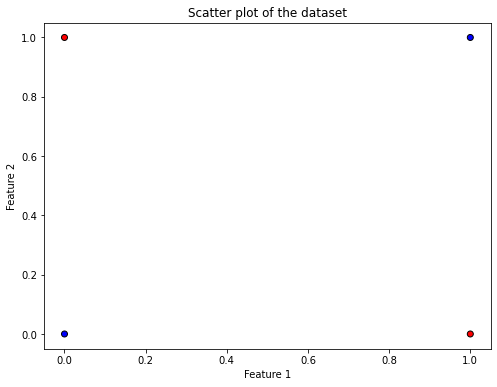

In [16]:
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])
plot_dataset(X_xor,y_xor)

## Question 3
Compare LMSE and Perceptron Algorithms for 3 datasets with two different learning rates.

In [ ]:
classifiers = """FILL"""
datasets = [(X_e,y_e),(X_h,y_h),(X_xor,y_xor),(X_e,y_e),(X_h,y_h),(X_xor,y_xor)]

# Plotting
fig, axs = plt.subplots(1, len(datasets), figsize=(15, 5))  # Adjust grid size as needed
for ax, (classifier, (X, y)) in zip(axs, zip(classifiers, datasets)):
    subplot_decision_boundary(classifier, X, y, ax=ax)
